# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt 

from wordcloud import WordCloud
from collections import Counter
   
from wordcloud import WordCloud
import re
from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

import spacy

from geopy.geocoders import Nominatim
import folium


from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/katerynalaptieva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/katerynalaptieva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading & Preprocessing Data

In [2]:
df = pd.read_csv('..\clean_data\isw.csv')
# df = pd.read_csv('isw.csv')
df

,date,title,url,html,main_text
0,24-02-2022,Russia-Ukraine Warning Update: Initial Russian...,https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...",february 24 3:00 pm est russian president vlad...
1,25-02-2022,Russia-Ukraine Warning Update: Russian Offensi...,https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...",russian forces carried out additional air and ...
2,26-02-2022,Russia-Ukraine Warning Update: Russian Offensi...,https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...",russia has surprisingly failed to gain air sup...
3,27-02-2022,Russia-Ukraine Warning Update: Russian Offensi...,https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...",february 27 4pm est the russian military has l...
4,28-02-2022,"Russian Offensive Campaign Assessment, Februar...",https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...",february 28 3:30pm est the russian military is...
...,...,...,...,...,...
331,21-01-2023,"Russian Offensive Campaign Assessment, January...",https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...",the ukrainian defense of bakhmut is likely a s...
332,22-01-2023,"Russian Offensive Campaign Assessment, Januar...",https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...",isw is publishing an abbreviated campaign upda...
333,23-01-2023,"Russian Offensive Campaign Assessment, January...",https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...",ukrainian intelligence assessed that russian f...
334,24-01-2023,"Russian Offensive Campaign Assessment, January...",https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...",a coalition of nato member states reportedly w...


In [3]:
df.describe()

,date,title,url,html,main_text
count,336,333,333,333,333
unique,336,333,333,333,333
top,24-02-2022,Russia-Ukraine Warning Update: Initial Russian...,https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...",february 24 3:00 pm est russian president vlad...
freq,1,1,1,1,1


In [4]:
pd.set_option('display.max_colwidth', None)
column_data = df['main_text']
column_data.head(1)

0    february 24 3:00 pm est russian president vladimir putin began a large-scale invasion of ukraine on february 24 likely aimed at full regime change and the occupation of ukraine his claimed objective to demilitarize and de-nazify ukraine is a transparent cover for an unprovoked war of aggression to occupy a neighboring state putin and kremlin media continue to deny that the russian invasion is a war instead describing it as a special military operation putin’s messaging is likely aimed at a domestic russian audience which the kremlin has not fully prepared for the costs of a war against ukraine russian officials and state media have been denying and mocking western warnings of the impending russian invasion for months and as recently as february 23 russian forces remain much larger and more capable than ukraine’s conventional military russia will likely defeat ukrainian regular military forces and secure their territorial objectives at some point in the coming days or weeks if puti

In [5]:
df.isnull().sum()

date         0
title        3
url          3
html         3
main_text    3
dtype: int64

In [6]:
df = df.dropna()    
df.count()

date         333
title        333
url          333
html         333
main_text    333
dtype: int64

In [7]:
df.dtypes

date         object
title        object
url          object
html         object
main_text    object
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df.dtypes

/var/folders/mn/8ccfkq3110362jt6vsw_1gyc0000gn/T/ipykernel_91797/1445486952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')


date         datetime64[ns]
title                object
url                  object
html                 object
main_text            object
dtype: object

# Visualization | EDA

### Functions for the word count and vocabulary richness

In [9]:
def calculate_word_count(text):
    return len(word_tokenize(text))

def calculate_vocabulary_richness(text):
    words = word_tokenize(text.lower())
    return len(set(words)) / len(words) if len(words) > 0 else 0

In [10]:
df['month'] = df['date'].dt.month

df['word_count'] = df['main_text'].apply(calculate_word_count)
df['vocabulary_richness'] = df['main_text'].apply(calculate_vocabulary_richness)

monthly_stats = df.groupby('month').agg({'word_count': 'mean', 'vocabulary_richness': 'mean'})

/var/folders/mn/8ccfkq3110362jt6vsw_1gyc0000gn/T/ipykernel_91797/147494711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
/var/folders/mn/8ccfkq3110362jt6vsw_1gyc0000gn/T/ipykernel_91797/147494711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['main_text'].apply(calculate_word_count)
/var/folders/mn/8ccfkq3110362jt6vsw_1gyc0000gn/T/ipykernel_91797/147494711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

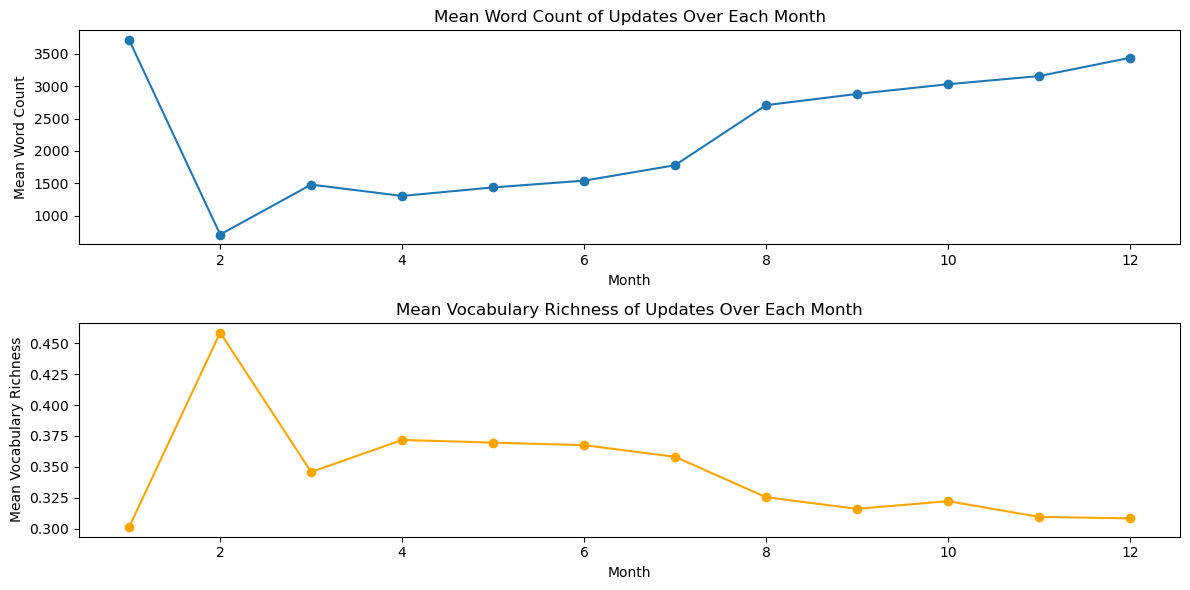

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(monthly_stats.index, monthly_stats['word_count'], marker='o')
plt.title('Mean Word Count of Updates Over Each Month')
plt.xlabel('Month')
plt.ylabel('Mean Word Count')

plt.subplot(2, 1, 2)
plt.plot(monthly_stats.index, monthly_stats['vocabulary_richness'], marker='o', color='orange')
plt.title('Mean Vocabulary Richness of Updates Over Each Month')
plt.xlabel('Month')
plt.ylabel('Mean Vocabulary Richness')

plt.tight_layout()
plt.show()

### Superficial assessment of the mood of the text

In [12]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, str):
        words = word_tokenize(text.lower())
        filtered_words = [word for word in words if word not in stop_words and len(word) > 1]
        lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
        return ' '.join(lemmatized_words)
    else:
        return ''

df['clean_text'] = df['main_text'].apply(preprocess_text)

def analyze_sentiment(text):
    if isinstance(text, str):
        blob = TextBlob(text)
        sentiment_score = blob.sentiment.polarity
        if sentiment_score > 0:
            return 'Positive'
        elif sentiment_score < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'  


df['sentiment'] = df['clean_text'].apply(analyze_sentiment)

sentiment_distribution = df['sentiment'].value_counts(normalize=True) * 100
print("Sentiment Distribution:")
print(sentiment_distribution)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/katerynalaptieva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/katerynalaptieva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/katerynalaptieva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/mn/8ccfkq3110362jt6vsw_1gyc0000gn/T/ipykernel_91797/3518866549.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['main_text'].apply(preprocess_text)


Sentiment Distribution:
sentiment
Positive    81.081081
Negative    18.918919
Name: proportion, dtype: float64


/var/folders/mn/8ccfkq3110362jt6vsw_1gyc0000gn/T/ipykernel_91797/3518866549.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['clean_text'].apply(analyze_sentiment)


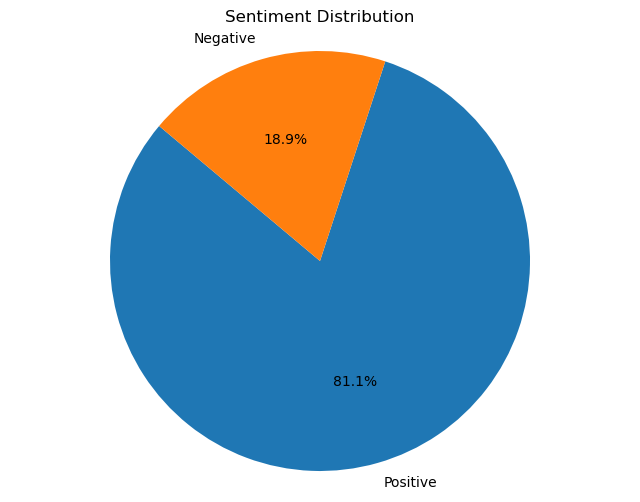

In [13]:
plt.figure(figsize=(8, 6))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  
plt.show()

### Check for any skipped dates

In [14]:
sorted_dates = df['date'].sort_values()

skipped_dates = []
prev_date = None

for date in sorted_dates:
    if prev_date is not None:
        if (date - prev_date).days > 1:
            skipped_dates.append(prev_date + pd.DateOffset(days=1))
    prev_date = date

if skipped_dates:
    print("Skipped dates found:")
    for date in skipped_dates:
        print(date.strftime('%Y-%m-%d'))
else:
    print("No skipped dates found.")

Skipped dates found:
2022-11-24
2022-12-25
2023-01-01


### Plotting the word count for each day

Text(0, 0.5, 'Word Count')

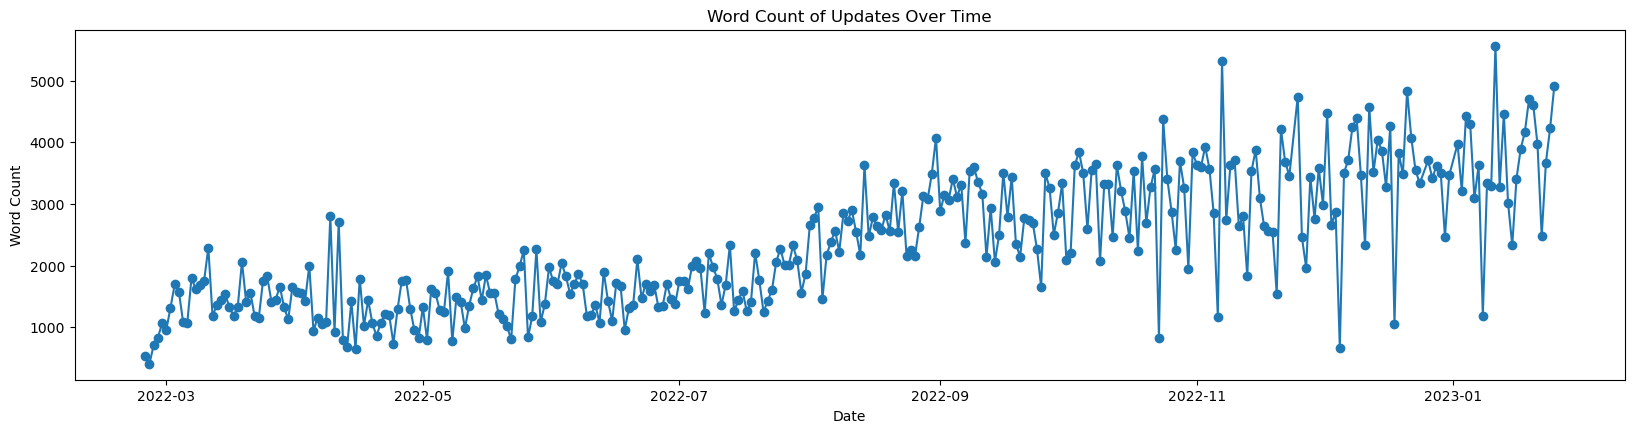

In [15]:
plt.figure(figsize=(20, 10))

# Plot 1: Word Count of Updates Over Time
plt.subplot(2, 1, 1)
plt.plot(df['date'], df['word_count'], marker='o')
plt.title('Word Count of Updates Over Time')
plt.xlabel('Date')
plt.ylabel('Word Count')

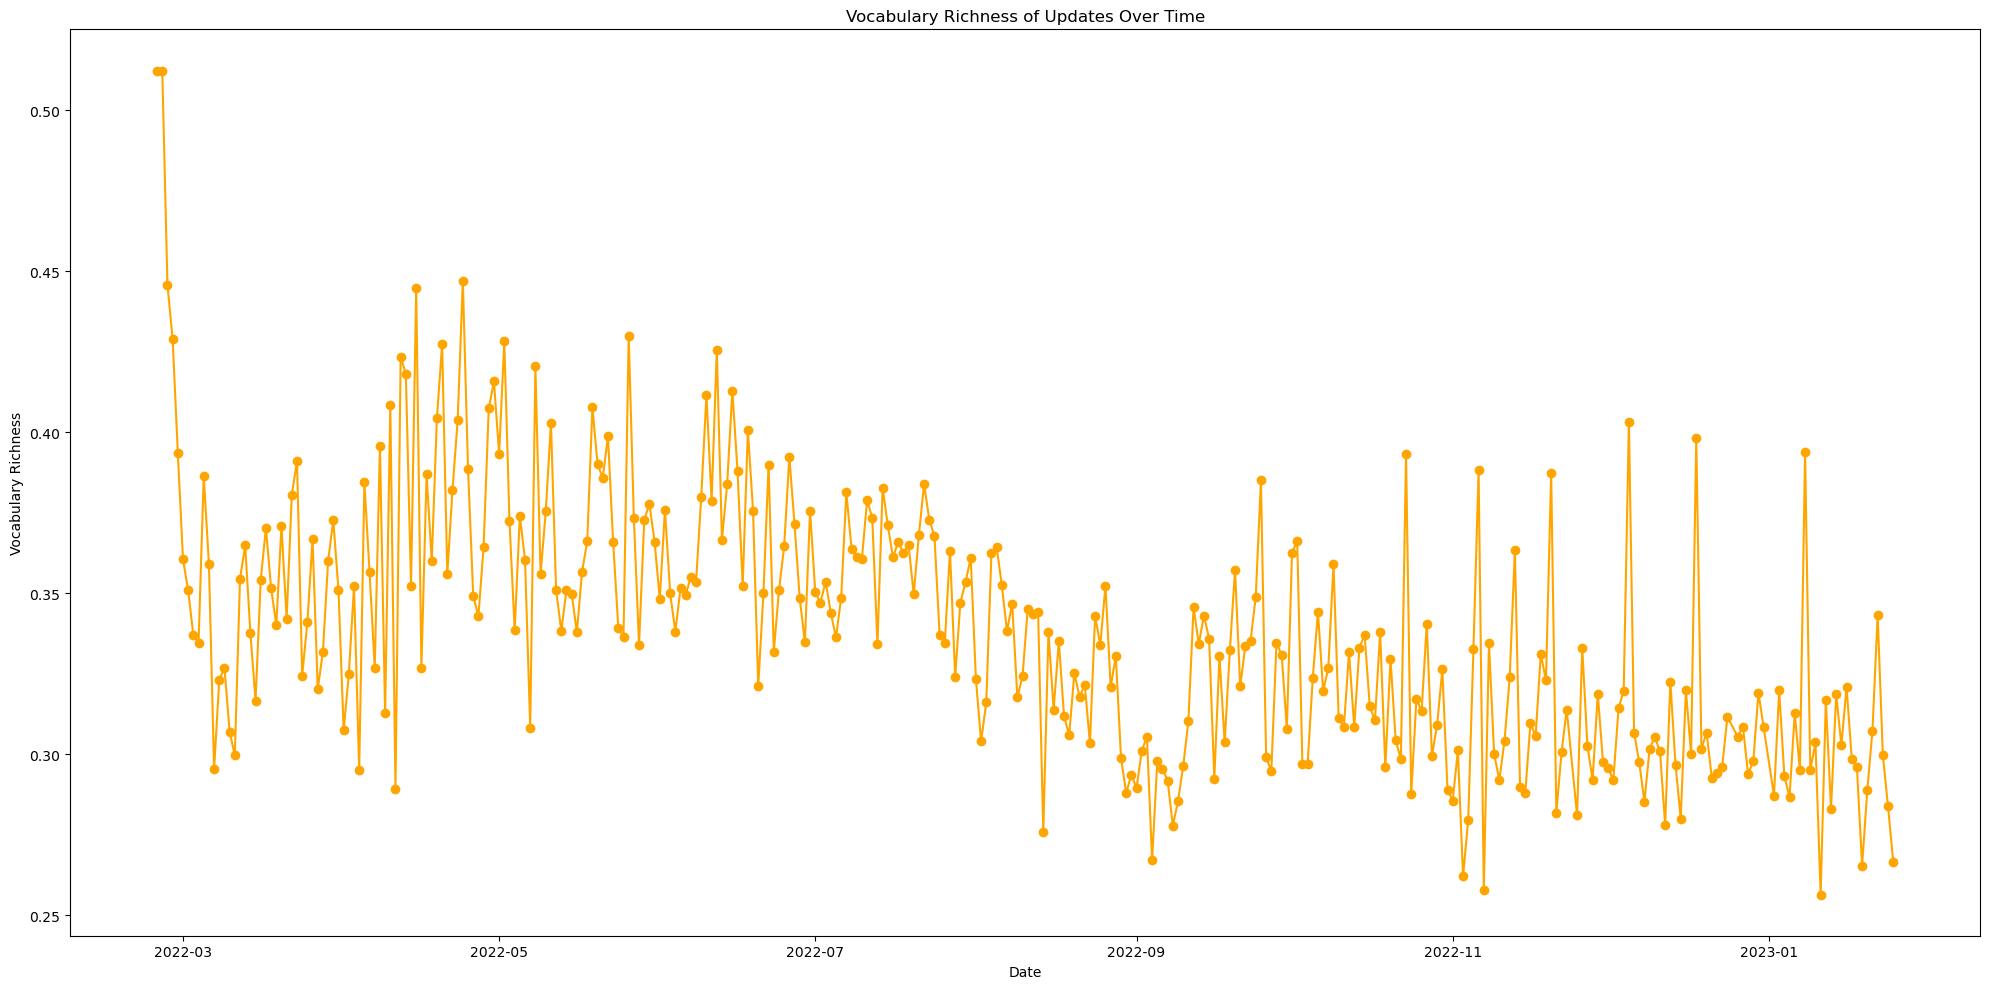

In [16]:
# Plot 2: Vocabulary Richness of Updates Over Time
plt.figure(figsize=(20, 10))  # Create a new figure
plt.plot(df['date'], df['vocabulary_richness'], marker='o', color='orange')
plt.title('Vocabulary Richness of Updates Over Time')
plt.xlabel('Date')
plt.ylabel('Vocabulary Richness')

plt.tight_layout()
plt.show()


/var/folders/mn/8ccfkq3110362jt6vsw_1gyc0000gn/T/ipykernel_91797/2960623561.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['main_text'].apply(calculate_word_count)
/var/folders/mn/8ccfkq3110362jt6vsw_1gyc0000gn/T/ipykernel_91797/2960623561.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_sentence_length'] = df['main_text'].apply(get_avg_sentence_length)


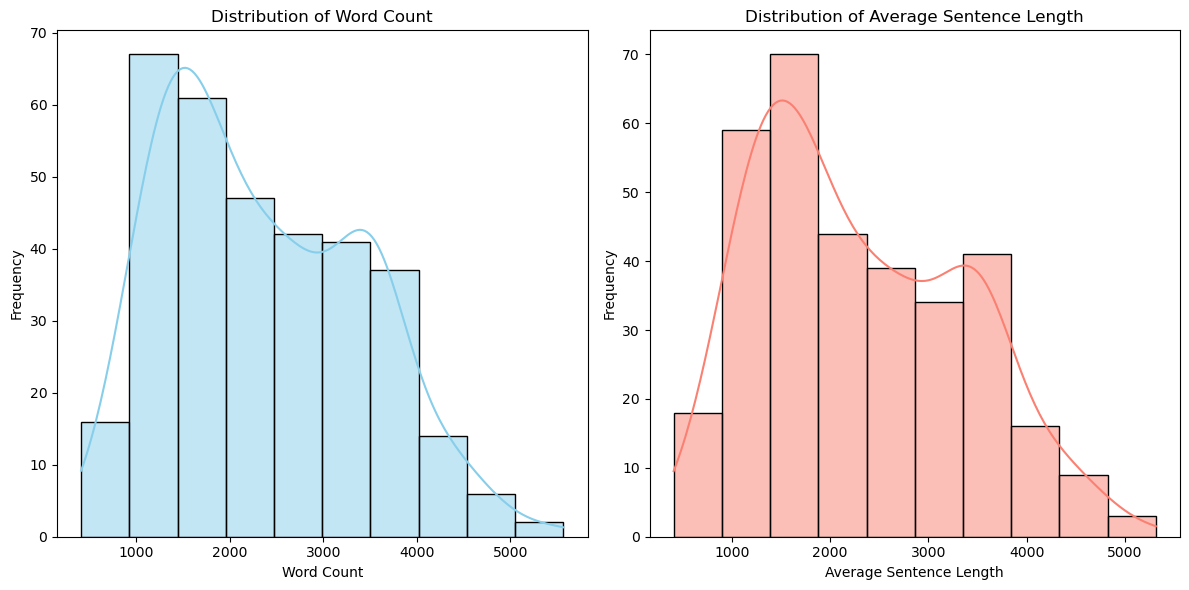

In [17]:
def get_avg_sentence_length(text):
    sentences = nltk.sent_tokenize(text)
    total_words = sum(len(word_tokenize(sentence)) for sentence in sentences)
    total_sentences = len(sentences)
    return total_words / total_sentences if total_sentences > 0 else 0

df['word_count'] = df['main_text'].apply(calculate_word_count)
df['avg_sentence_length'] = df['main_text'].apply(get_avg_sentence_length)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['word_count'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['avg_sentence_length'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Average Sentence Length')
plt.xlabel('Average Sentence Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Let's take a look on the day with the greatest number of words

In [18]:
max_word_row = df.loc[df['word_count'].idxmax()]

day_with_most_words = max_word_row['date']
title_with_most_words = max_word_row['title']

print("Day with the most words:", day_with_most_words)
print("Title:", title_with_most_words)

Day with the most words: 2023-01-11 00:00:00
Title: Russian Offensive Campaign Assessment, January 11, 2023 | Institute for the Study of War


### The most frequent words

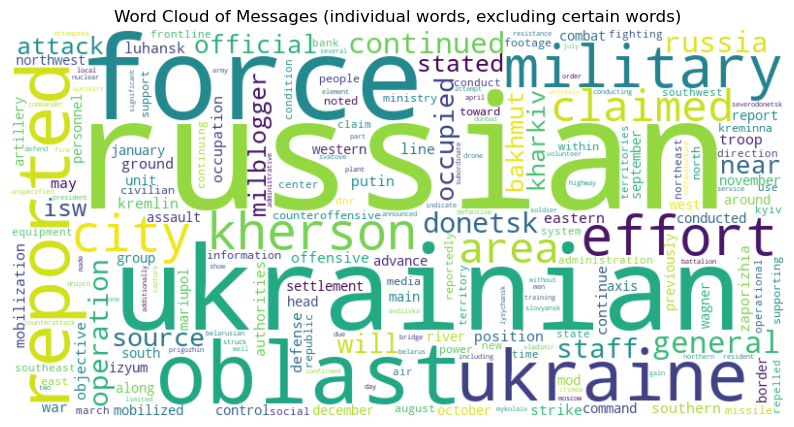

In [19]:
text = ' '.join(df['main_text'].astype(str))

words_to_drop = ['the', 'of', 'and', 'to', 'in', 'that', 'on', 'a', 'are', 's', 'for', 'from', 'as', 'likely', 'is'] 

words = re.findall(r'\b[^\W\d_]+\b', text)  # Extract words containing only letters

words = [word for word in words if word.lower() not in words_to_drop]

cleaned_text = ' '.join(words)

wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(cleaned_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Messages (individual words, excluding certain words)')
plt.axis('off')
plt.show()

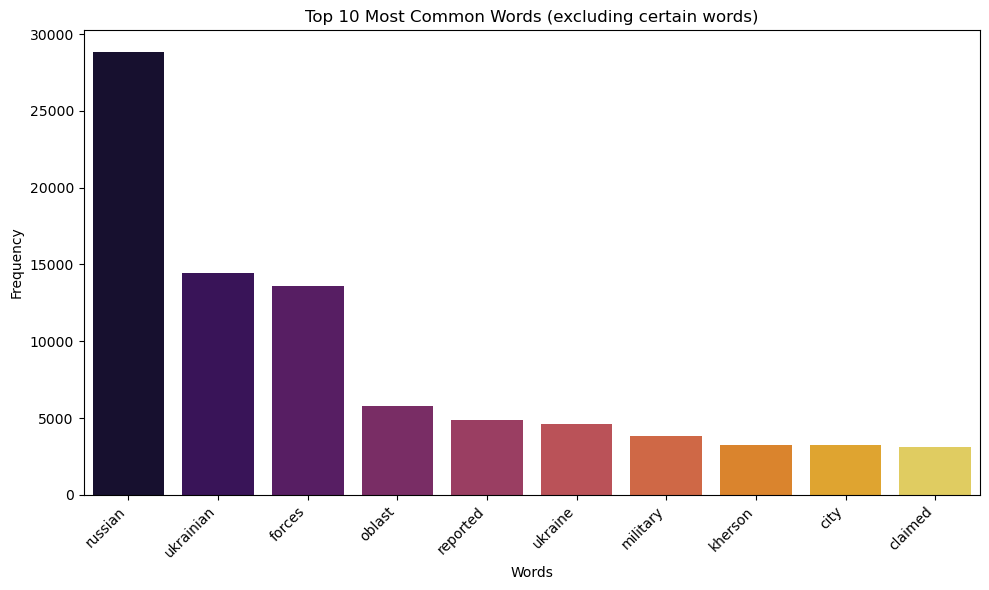

In [20]:
word_counts = Counter(words)

top_n = 10  
top_words, frequencies = zip(*word_counts.most_common(top_n))

data = pd.DataFrame({'Word': top_words, 'Frequency': frequencies})

plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=data, palette='inferno')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Common Words (excluding certain words)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### The data about top mentioned words does not give a lot of information.

In [21]:
# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

def extract_cities(text, drop_words=[]):
    if pd.isnull(text):  
        return []
    doc = nlp(text)
    cities = [ent.text for ent in doc.ents if ent.label_ == "GPE" and ent.text.lower() not in drop_words]  
    return cities

words_to_drop = ["ukraine", "russia", "moscow", "haidai", "iran", "us", "the russian federation", "the west bank",
                "syria", "the united states", "st.", "uk", "tatarstan", "bashkortostan", "ukrainian", "nizhny", 
                 "chechnya", "peskov", "the soviet union", "the chechen republic", "donbas"]  

df['cities_mentioned'] = df['main_text'].apply(lambda x: extract_cities(x, drop_words=words_to_drop))

all_cities = [city for sublist in df['cities_mentioned'] for city in sublist]

city_counts = pd.Series(all_cities).value_counts()

top_cities = city_counts.head(30)  
print("Top mentioned cities:")
print(top_cities)

Top mentioned cities:
kherson city                      428
kreminna                          351
luhansk                           203
kherson                            97
klishchiivka                       54
ukraine putin                      27
luhansk city                       26
kakhovka                           20
skadovsk                           18
chechen republic                   17
bilohorivka                        16
samara                             15
georgia                            15
poland                             14
the east bank                      14
kazakhstan                         13
kharkiv city                       13
washington                         13
tehran                             13
sverdlovsk                         13
the chechen republic ramzan        12
rubizhne                           12
moldova                            12
niu york                           12
novosilka                          12
novoselivske                

/var/folders/mn/8ccfkq3110362jt6vsw_1gyc0000gn/T/ipykernel_91797/3403981181.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cities_mentioned'] = df['main_text'].apply(lambda x: extract_cities(x, drop_words=words_to_drop))


### Exploring the most frequently mentioned cities

In [22]:
def get_coordinates(city):
    geolocator = Nominatim(user_agent="city_visualizer")
    location = geolocator.geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

def visualize_cities(cities):
    map_center = [0, 0]
    city_map = folium.Map(location=map_center, zoom_start=2)

    for city, count in cities.items():
        lat, lon = get_coordinates(city)
        if lat is not None and lon is not None:
            folium.Marker(location=[lat, lon], popup=f"{city}: {count}").add_to(city_map)
        else:
            print(f"Coordinates not found for {city}")

    return city_map

top_cities_data = {
    'kherson city': 475,
    'kreminna': 405,
    'luhansk': 201,
    'kherson': 76,
    'klishchiivka': 60,
    'bilohorivka': 57,
    'pervomaiske': 30,
    'luhansk city': 30,
    'kakhovka': 29,
    'skadovsk': 23,
    'rubizhne': 22,
    'melitopol': 20,
    'kurulka': 18,
    'luhansk oblast': 17,
    'krasnohorivka': 17,
    'novoselivske': 16,
    'klynove': 16,
    'nova kakhovka': 14,
    'dnipropetrovsk': 13,
    'vinnytsia': 13
}

city_map = visualize_cities(top_cities_data)

city_map.save("city_visualization.html")


city_map

![Map for isw_eda](map.jpg)

 ## TF-IDF vectors

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = df['main_text'].tolist()

tfidf_vectorizer = TfidfVectorizer()

tfidf_vectors = tfidf_vectorizer.fit_transform(texts)

print("Shape of TF-IDF matrix:", tfidf_vectors.shape)

print("Vocabulary (Feature Names):", tfidf_vectorizer.get_feature_names_out())


Shape of TF-IDF matrix: (333, 16247)
Vocabulary (Feature Names): ['00' '03' '0500' ... 'підрозділи' 'рбк' 'сухопутный']


### Clustering

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(tfidf_vectors)

cluster_labels = kmeans.labels_

print("Cluster Labels:", cluster_labels)


/Users/katerynalaptieva/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Labels: [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [25]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between TF-IDF vectors
cosine_sim = cosine_similarity(tfidf_vectors)

query_index = 0
similarities_with_query = cosine_sim[query_index]

most_similar_indices = similarities_with_query.argsort()[::-1][1:]

print("Indices of most similar documents to the query document:", most_similar_indices)


Indices of most similar documents to the query document: [  3   8   1 198 189 117 199   6  89  36 206  88 188  30 293 295 264 193
 203 239   5  90 222   7 187  72  97 280 170 197  39 318  78 192  23 196
 285 240 302  71  58 298 251 113   2  93 252  69 292 131  95 101 103 287
 208 299 119 201  33 286 160  38 272 174 152 180 305  96 258 191 259 178
 151 294  98 223 304 226 115  79  61 134 173  81 225 308 331 310 171 244
 132 300  14 145 271 163  13 237 194   4 281  75 309  77 219  19 121 182
 127 205 279 128 221 110 311 167 166 118 332 154 288 159 261 246 102 273
 158  40 268  51 274  53 175 314 202 278  41 130 303 266   9 181 105  86
  57 168 104 200 146  70 290 247  82  80 326 195  73 218  68 139 319  92
 135 253  37  18 231  62 165  76 209 327  24 100 230 204 325 263 190 284
 270 291 109 124 176 301 106 150 322 320 126  28  29 169  74 307 250 184
  11 114 217  35 156 297 185  85  34 164 313 125 229 328  83 233 161 228
 317  66  65 267 108 242 238 256 212 257 243 207 162 232 321 179 27

### Topic Modeling:

In [27]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

words_to_exclude = ['the', 'of', 'and', 'to', 'in', 'that', 'on', 'is'] 

tfidf_vectorizer = TfidfVectorizer(stop_words=words_to_exclude)

tfidf_vectors = tfidf_vectorizer.fit_transform(texts)

num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)

nmf_vectors = nmf_model.fit_transform(tfidf_vectors)

# top words for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    print(f"Topic {topic_idx + 1}:")
    top_words_idx = topic.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)


Topic 1:
['russian', 'forces', 'ukrainian', 'july', 'august', 'oblast', 'city', 'are', 'reported', 'for']
Topic 2:
['march', 'russian', 'forces', 'kyiv', 'ukrainian', 'general', 'staff', 'chernihiv', 'are', 'from']
Topic 3:
['russian', 'ukrainian', 'forces', 'october', 'november', 'oblast', 'reported', 'are', 'kherson', 'ukraine']
Topic 4:
['russian', 'forces', 'april', 'ukrainian', 'mariupol', 'are', 'izyum', 'ukraine', 'azovstal', 'may']
Topic 5:
['russian', 'january', 'december', 'ukrainian', 'forces', 'putin', 'for', 'ukraine', 'wagner', 'as']


/Users/katerynalaptieva/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


### Keyword Extraction

In [28]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_scores = tfidf_vectors.toarray()

top_tfidf_words_idx = tfidf_scores.argsort(axis=1)[:, ::-1]

num_keywords = 5 
for i, doc_idx in enumerate(top_tfidf_words_idx):
    keywords = [tfidf_vectorizer.get_feature_names_out()[idx] for idx in doc_idx[:num_keywords]]
    print(f"Top Keywords for Document {i+1}: {keywords}")


Top Keywords for Document 1: ['russian', 'forces', 'airport', 'kyiv', 'ukraine']
Top Keywords for Document 2: ['forces', 'russian', 'kyiv', 'february', 'envelop']
Top Keywords for Document 3: ['russian', 'february', 'forces', '26', 'ukrainian']
Top Keywords for Document 4: ['russian', 'forces', 'february', '27', 'ukraine']
Top Keywords for Document 5: ['february', 'russian', '28', 'forces', 'technologies']
Top Keywords for Document 6: ['russian', 'kyiv', 'hours', 'forces', '24']
Top Keywords for Document 7: ['march', 'russian', 'forces', 'kyiv', 'likely']
Top Keywords for Document 8: ['march', 'russian', 'kyiv', 'forces', 'ukrainian']
Top Keywords for Document 9: ['russian', 'forces', 'kyiv', 'congested', 'march']
Top Keywords for Document 10: ['russian', 'march', 'kyiv', 'forces', 'ukrainian']
Top Keywords for Document 11: ['russian', 'lubny', 'kyiv', 'march', 'poltava']
Top Keywords for Document 12: ['russian', 'march', 'kyiv', 'zaporizhya', 'kilometers']
Top Keywords for Document 13

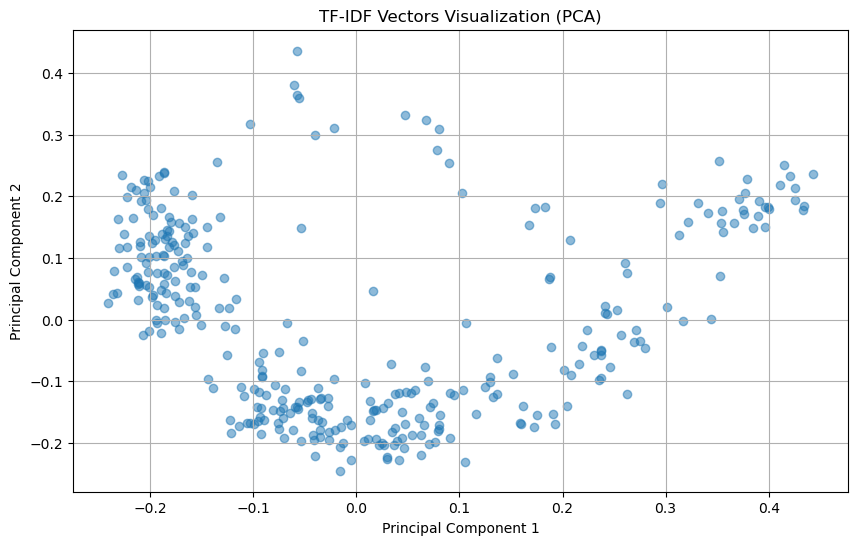

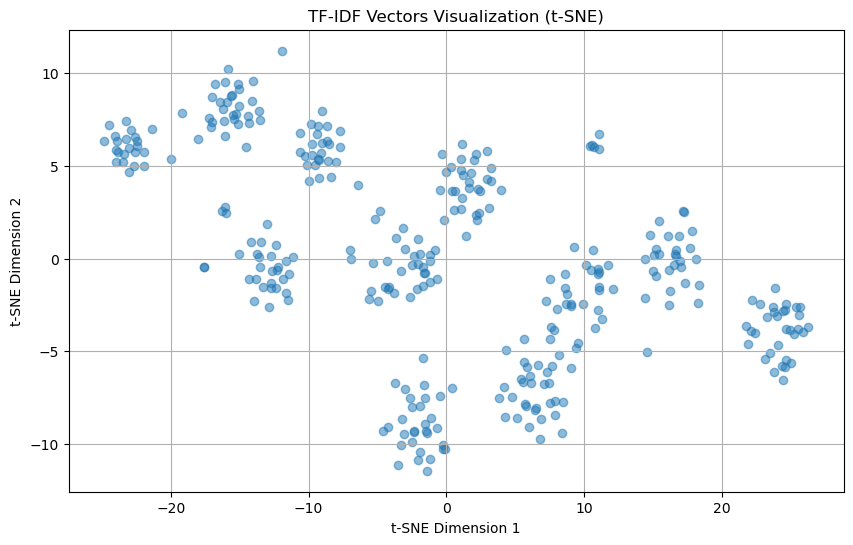

In [29]:

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2, random_state=42)
tfidf_vectors_pca = pca.fit_transform(tfidf_vectors.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(tfidf_vectors_pca[:, 0], tfidf_vectors_pca[:, 1], alpha=0.5)
plt.title("TF-IDF Vectors Visualization (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# Visualize TF-IDF vectors using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tfidf_vectors_tsne = tsne.fit_transform(tfidf_vectors.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(tfidf_vectors_tsne[:, 0], tfidf_vectors_tsne[:, 1], alpha=0.5)
plt.title("TF-IDF Vectors Visualization (t-SNE)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()
